In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df_point = pd.read_csv('point_scores.csv',index_col=0)
df_spread = pd.read_csv('spread_scores.csv',index_col=0)
df = df_point.set_index(['Model', 'Weeks ahead','Location']).join(df_spread.set_index(['Model', 'Weeks ahead','Location']),how='left')
# make LS positive
df['LS'] = -1*df['LS']
print(df_point)

                       Model        RMSE      NRMSE        MAPE  Weeks ahead  \
0             CMU-TimeSeries   19.266665   0.385333   55.976563            1   
1             CMU-TimeSeries  121.168206   1.223921   46.359399            1   
2             CMU-TimeSeries  114.476349   0.315362   58.278570            1   
3             CMU-TimeSeries  119.117750   0.206086  141.717922            1   
4             CMU-TimeSeries  558.270043   0.216384  114.393442            1   
...                      ...         ...        ...         ...          ...   
2851  VTSanghani-Transformer   11.229880   0.863837  128.187623            4   
2852  VTSanghani-Transformer  427.985174   1.389562   94.425931            4   
2853  VTSanghani-Transformer  182.748087   1.226497   87.475996            4   
2854  VTSanghani-Transformer  156.432902   2.113958   87.282573            4   
2855  VTSanghani-Transformer   36.794303  18.397151   79.509714            4   

     Location  
0          AK  
1      

/var/folders/8d/yc9nnvjx07j3ds1jzwshhn580000gn/T/ipykernel_73846/1156337021.py:12: FutureWarning: `sort_columns` is deprecated and will be removed in a future version.
  barlist = grouped.get_group(key).plot(ax=ax,kind='bar',x='Model',title=key,sort_columns=True,fontsize=10,color=my_colors)
/var/folders/8d/yc9nnvjx07j3ds1jzwshhn580000gn/T/ipykernel_73846/1156337021.py:12: FutureWarning: `sort_columns` is deprecated and will be removed in a future version.
  barlist = grouped.get_group(key).plot(ax=ax,kind='bar',x='Model',title=key,sort_columns=True,fontsize=10,color=my_colors)
/var/folders/8d/yc9nnvjx07j3ds1jzwshhn580000gn/T/ipykernel_73846/1156337021.py:12: FutureWarning: `sort_columns` is deprecated and will be removed in a future version.
  barlist = grouped.get_group(key).plot(ax=ax,kind='bar',x='Model',title=key,sort_columns=True,fontsize=10,color=my_colors)
/var/folders/8d/yc9nnvjx07j3ds1jzwshhn580000gn/T/ipykernel_73846/1156337021.py:12: FutureWarning: `sort_columns` is deprecat

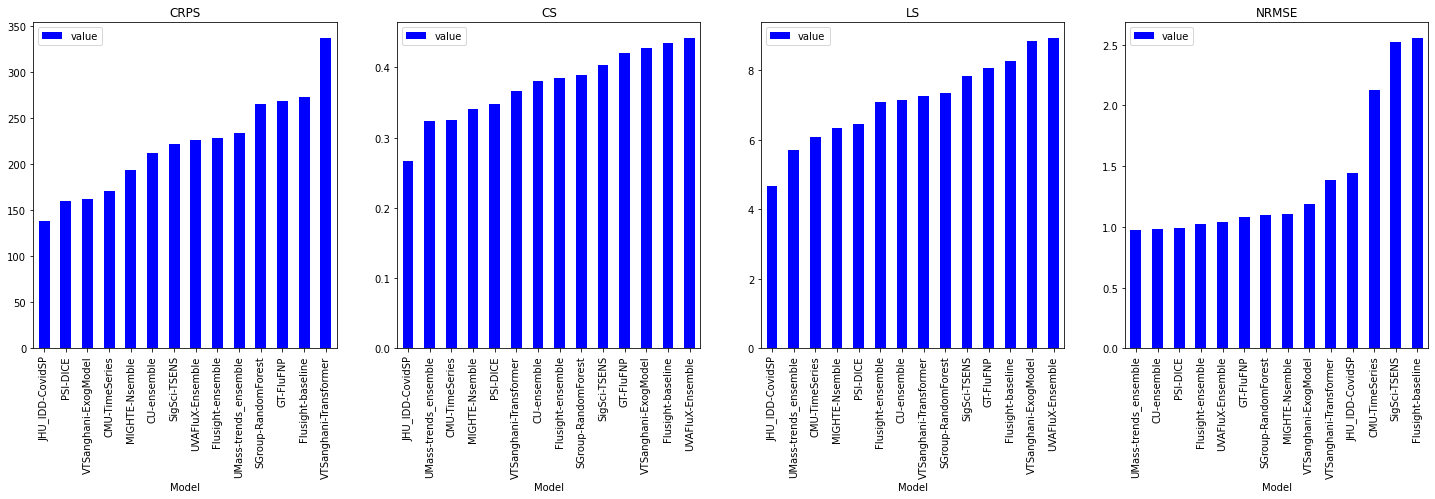

In [2]:
def plot_boxplots(dfi):
    # dfi = avg_per_model_per_week
    dfi = dfi.groupby(['Model']).mean().reset_index()
    # plot
    dfi = dfi.melt(id_vars=['Model'], value_vars=['NRMSE','CRPS','LS','CS'])
    dfi.set_index('variable',inplace=True)
    dfi = dfi.sort_values(by='value')
    grouped = dfi.groupby(level='variable')
    my_colors = ['blue' if i<2 else 'black' for i in range(26)]
    fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(25,6), sharey=False,squeeze=False)
    for (key, ax) in zip(grouped.groups.keys(), axes.flatten()):
        barlist = grouped.get_group(key).plot(ax=ax,kind='bar',x='Model',title=key,sort_columns=True,fontsize=10,color=my_colors)
    ax.legend()
    plt.show()

overall_avg_per_model = df.groupby(['Model']).mean()
plot_boxplots(overall_avg_per_model)

In [5]:
overall_avg_per_model = df.groupby(['Model']).mean()
overall_avg_per_model

,RMSE,NRMSE,MAPE,LS,CRPS,CS
Model,,,,,,
CMU-TimeSeries,242.120432,2.124111,1.304875e+06,6.071857,170.338824,0.325538
CU-ensemble,256.720025,0.984668,1.276132e+06,7.150415,212.479793,0.380994
Flusight-baseline,313.423837,2.556935,8.885545e+05,8.265489,272.999322,0.434480
Flusight-ensemble,288.938063,1.021562,1.009577e+06,7.092310,228.835010,0.384885
GT-FluFNP,321.871224,1.078705,1.237234e+06,8.058378,268.646028,0.420549
JHU_IDD-CovidSP,214.976250,1.444593,9.331813e+05,4.664172,137.924952,0.266691
MIGHTE-Nsemble,257.048237,1.104225,1.837942e+06,6.324526,193.544971,0.340007
PSI-DICE,224.216712,0.988877,1.241053e+06,6.451331,159.821960,0.347919
SGroup-RandomForest,344.835892,1.094973,8.952066e+05,7.330994,265.512886,0.389663


In [6]:
nrsme_df_avg = overall_avg_per_model[['NRMSE']]
nrsme_df_avg = nrsme_df_avg.sort_values(by='NRMSE')
nrsme_df_avg

,NRMSE
Model,
UMass-trends_ensemble,0.972090
CU-ensemble,0.984668
PSI-DICE,0.988877
Flusight-ensemble,1.021562
UVAFluX-Ensemble,1.043016
GT-FluFNP,1.078705
SGroup-RandomForest,1.094973
MIGHTE-Nsemble,1.104225
VTSanghani-ExogModel,1.184779


In [7]:
ls_df_avg = overall_avg_per_model[['LS']]
ls_df_avg = ls_df_avg.sort_values(by='LS')
ls_df_avg

,LS
Model,
JHU_IDD-CovidSP,4.664172
UMass-trends_ensemble,5.709211
CMU-TimeSeries,6.071857
MIGHTE-Nsemble,6.324526
PSI-DICE,6.451331
Flusight-ensemble,7.092310
CU-ensemble,7.150415
VTSanghani-Transformer,7.266932
SGroup-RandomForest,7.330994


In [8]:
cs_df_avg = overall_avg_per_model[['CS']]
cs_df_avg = cs_df_avg.sort_values(by='CS')
cs_df_avg

,CS
Model,
JHU_IDD-CovidSP,0.266691
UMass-trends_ensemble,0.323049
CMU-TimeSeries,0.325538
MIGHTE-Nsemble,0.340007
PSI-DICE,0.347919
VTSanghani-Transformer,0.366093
CU-ensemble,0.380994
Flusight-ensemble,0.384885
SGroup-RandomForest,0.389663


In [9]:
crps_df_avg = overall_avg_per_model[['CRPS']]
crps_df_avg = crps_df_avg.sort_values(by='CRPS')
crps_df_avg

,CRPS
Model,
JHU_IDD-CovidSP,137.924952
PSI-DICE,159.821960
VTSanghani-ExogModel,162.567181
CMU-TimeSeries,170.338824
MIGHTE-Nsemble,193.544971
CU-ensemble,212.479793
SigSci-TSENS,221.562323
UVAFluX-Ensemble,225.943958
Flusight-ensemble,228.835010


In [10]:
rsme_df_avg = overall_avg_per_model[['RMSE']]
rsme_df_avg = rsme_df_avg.sort_values(by='RMSE')
rsme_df_avg

,RMSE
Model,
VTSanghani-ExogModel,193.918656
JHU_IDD-CovidSP,214.976250
PSI-DICE,224.216712
CMU-TimeSeries,242.120432
CU-ensemble,256.720025
MIGHTE-Nsemble,257.048237
SigSci-TSENS,276.036901
UVAFluX-Ensemble,287.571228
Flusight-ensemble,288.938063


In [11]:
mape_df_avg = overall_avg_per_model[['MAPE']]
mape_df_avg = mape_df_avg.sort_values(by='MAPE')
mape_df_avg

,MAPE
Model,
Flusight-baseline,8.885545e+05
SGroup-RandomForest,8.952066e+05
JHU_IDD-CovidSP,9.331813e+05
UVAFluX-Ensemble,9.783370e+05
Flusight-ensemble,1.009577e+06
UMass-trends_ensemble,1.045957e+06
SigSci-TSENS,1.211734e+06
GT-FluFNP,1.237234e+06
PSI-DICE,1.241053e+06
